In [1]:
import numpy as np
import numpy as np
import scipy as sc
from scipy import linalg
import matplotlib as plt
import numpy as np
from numpy import genfromtxt
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import invgamma
import matplotlib.pyplot as plt
from sympy import Matrix
from datetime import datetime
import seaborn as sns
import math
import time
ordqz = sc.linalg.ordqz
svd = sc.linalg.svd
import pandas as pd
resh  = np.reshape
norm = np.random.standard_normal
zeros = np.zeros
import scipy as sc
inv =  sc.linalg.inv
resh = np.reshape
m = np.matmul
eig = sc.linalg.eig
det = np.linalg.det

# Initialize Parameters
psi = 1.6**-1;epsilon = 1.2;alpha = .3;sigma = .1;rho = .9;rho_k = .9;
delta = 2.3**-1;n1 = 1.1**-1;n2 = 1.1**-1
phi_b = 1.5;phi_s= 0.1;theta = .016;phi_x = 0.5;phi_pi = 1.5;phi_t =.2;rh0= .7;h_w = .5;h_r = 1-h_w
p_u = .5;p_r = .5;p_s = .5;p_e = .5;p_a = .5; p_r_star = .5;
sig_u =.2;sig_r = .2;sig_s = .2;sig_e = .2;sig_a = .2;sig_r_star = .1
# Initialize Parameters
psi = 1.6**-1;epsilon = 1.2;alpha = .3;sigma = .015;rho = .9;rho_k = .93;
delta = 2.3**-1;n1 = 1.1**-1;n2 = 1.1**-1
phi_b = 1.5;phi_s= 0.1;theta = .016;
phi_x = 0.5;phi_pi = 1.5;phi_t =.2;
rh0= .7;h_w = .5;h_r = 1-h_w
p_u = .5;p_r = .5;p_s = .5;p_e = .5;p_a = .5;g = 0.03


#### Nuisance parameters ########
r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;
C_bar = .60;K_bar = .4;Y_bar = 1;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
z1 = (c1**-1)*c2-(c1**-1)*c2*(1-sigma);z2 = 1;z3 = (c1**-1)*(delta**-1)*(1+((1-phi_b)**-1)*phi_b*h_r);z4 = -(c1**-1)*(delta**-1)
z5 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(-phi_b+rho-1)*h_r;z6 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(phi_b+phi_s)*p_s*h_r
z7 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(phi_t)*h_r;z8 = -(c1**-1)*(c2)*(1-2*sigma)*rho_k*(.996+.004*.42);
z9 = -(c1**-1)*(c2)*(1-2*sigma);z10 = (c1**-1)*(c2)*(2*sigma);z11 = -delta**-1


rho =.89 ;rho_k = .9059
x = .99*rho

#print( 'duration gov bond: ', (x*(1-x)**-2)/12 )
xk = .99*rho_k
c1 = .997+.003*.42
#print( 'duration corp bond: ', (xk*(1-xk)**-2)/12*c1 )


# In[3]:


def set_para():
    para=  np.zeros([30])
    para[0] =psi;
    para[1] = epsilon;
    para[2] = alpha;
    para[3] = sigma;
    para[4] = rho;
    para[5] = rho_k;
    para[6] = delta;
    para[7] = n1;
    para[8] = n2;
    para[9]= phi_b;
    para[10] =phi_s;
    para[11] = theta;
    para[12] = phi_x;
    para[13] = phi_pi;
    para[14] = phi_t;
    para[15] = rh0;
    para[16] = h_w;
    para[17] = p_u;
    para[18] = p_r;
    para[19] = p_s;
    para[20] = p_e;
    para[21] = p_a;
    para[22] = p_r_star;
    para[23] = sig_u 
    para[24] = sig_r
    para[25] = sig_s
    para[26] = sig_e
    para[27] = sig_a
    para[28] = sig_r_star
    para[29] = g

    return para


# In[4]:


def Solve_ZLB(para):
    m = np.matmul
    inv = np.linalg.inv

    # Define Variables
    psi = para[0];epsilon = para[1];alpha = para[2];sigma = para[3];rho = para[4];rho_k = para[5];delta = para[6];n1 = para[7];n2 = para[8];phi_b = para[9];phi_s= para[10];theta = para[11];phi_x = para[12];phi_pi = para[13];phi_t =para[14];rh0= para[15];h_w = para[16];h_r = 1-h_w;p_u = para[17];p_r = para[18];p_s = para[19];p_e = para[20];p_a = para[21];p_r_star = para[22];
    p_r_star = para[22];sig_u =para[23];sig_r = para[24];sig_s = para[25];sig_e = para[26];sig_a = para[27];sig_r_star = para[28]
    h_r = 1-h_w;
    r = 0;a = 1;s = 2;u = 3;e = 4;
    r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;i_sh = 5
    b = 5;k = 6;q_km = 7;b_km = 8;w = 9;tau = 10;b_k = 11;i = 12
    y = 13;pi = 14;q = 15;q_k = 16
    C_bar = .6;K_bar = .4;Y_bar = 1;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
    # Set up nuisance parameters
    alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
    phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
    phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
    # Generate Matrices
    GAM0 = np.zeros([17,17]);GAM1 = np.zeros([17,17]);PSI = np.zeros([17,6])    
    # EQ 0 Goverment Bond Demand
    GAM0[b,b] =1
    GAM1[b,b] =1
    GAM0[b,q] = (1-rho)
    GAM0[b,pi] =1
    GAM0[b,tau] = 1
    GAM0[b,s] = 1
    # EQ 1 Capital Evolution 
    GAM0[k,k] =1
    GAM1[k,k] =1-sigma
    GAM0[k,b_km] =-1*( 1-2*sigma)
    GAM0[k,q_km] =-1*(1-2*sigma)
    GAM1[k,b_km] = -2*sigma
    GAM1[k,q_km] = -2*sigma
    GAM1[k,e] = -2*sigma
    # EQ 2 tech shock
    GAM0[a,a] = 1
    GAM1[a,a] = p_a
    PSI[a,a_sh] = sig_a
    # EQ 3 Seinorage shock
    GAM0[s,s] = 1 
    GAM1[s,s] = p_s
    PSI[s,s_sh] = sig_s
    # EQ 4 Demand shock
    GAM0[r,r] = 1
    GAM0[r,i] = p_r_star
    GAM1[r,r] = p_r 
    PSI[r,r_sh] = sig_r 
    # EQ 5 Cost Push shock
    GAM0[u,u] = 1 
    GAM1[u,u] = p_u 
    PSI[u,u_sh] = sig_u 
    # EQ 7 Investment "Credit Freeze" shock
    GAM0[e,e] = 1 
    GAM1[e,e] = p_e 
    PSI[e,e_sh] = sig_e 
    # EQ 8 coporate bond price lag
    GAM0[q_km,q_km] = 1
    GAM1[q_km,q_k] = 1
    # EQ 9 coporate bond demand lag
    GAM0[b_km,b_km] = 1
    GAM1[b_km,b_k] = 1
    # EQ 10 Money/IS equation
    GAM1[y,y] = c1
    GAM1[y,k] = c2
    GAM0[y,y] = c1*delta**-1
    GAM0[y,k] = -c2*delta**-1
    GAM0[y,pi] = delta**-1
    GAM0[y,tau] = -h_r*delta**-1
    #GAM1[y,i] = delta**-1
    GAM1[y,r] = -delta**-1
    # EQ 11 Phillips Curve
    GAM1[pi,pi] = 1
    GAM0[pi,pi] =v_1
    GAM1[pi,w] = -v_2*phi_1
    GAM1[pi,y] = -v_2*phi_2
    GAM1[pi,k] = v_2*phi_3
    GAM0[pi,tau] = v_2*phi_4
    GAM0[pi,u] =1
    # EQ 12 Gov Bond Pricing
    GAM1[q,q] = n1
    GAM1[q,b] = n1
    GAM1[q,y] = -delta*c1
    GAM1[q,k] = delta*c2
    GAM0[q,y] = .99*delta*c1
    GAM0[q,k] = -.99*delta*c2
    GAM0[q,pi] = .99*delta
    GAM0[q,tau] = h_r
    GAM0[q,q] = -.99*rho
    # EQ 13 Corp Bond Pricing
    GAM1[q_k,q] = 1-n2-Q**-1
    GAM1[q_k,b] = n2
    GAM1[q_k,y] = -delta*c1*(Q**-1)
    GAM1[q_k,k] = delta*c2*(Q**-1)
    GAM0[q_k,y] = .99*delta*c1*.994*(Q**-1)
    GAM0[q_k,k] = -.99*delta*c2*.994*(Q**-1)
    GAM0[q_k,pi] = .99*delta*.994*(Q**-1)
    GAM0[q_k,tau] = h_r*.994*(Q**-1)
    GAM0[q_k,q_k] = -(.99*rho_k*.994-.99*rho_k*.42*.006)*(Q**-1)
    # EQ 14 Monetary Policy
    GAM0[i,i] = 1
    GAM1[i,i] = 1
    PSI[i,i_sh] =sig_r_star
    # EQ 15 Wages
    GAM0[w,w] = 1-alpha*psi
    GAM0[w,q_k] = -2*alpha*psi
    GAM0[w,b_k] = -2*alpha*psi
    GAM1[w,q_k] = -2*alpha*psi
    GAM1[w,b_k] = -2*alpha*psi
    GAM0[w,e] = -2*alpha*psi
    GAM0[w,y] = -(delta-psi)*c1
    GAM0[w,a] = -psi
    GAM0[w,k] = delta*c2 
    GAM0[w,tau] = h_w 
    # EQ 16 Tax LOM
    GAM0[tau,tau] =1    
    GAM0[tau,b] = -phi_b
    GAM0[tau,q] = -phi_b 
    GAM0[tau,s] = phi_s 
    GAM1[tau,tau] = phi_t 

    # EQ 17 Corporate Bond Demand
    GAM0[b_k,b_k] = 1
    GAM0[b_k,w] = -1
    GAM1[b_k,q_k] = 1
    GAM1[b_k,b_k] = 1
    GAM0[b_k,y] = -(1-alpha)**-1
    GAM0[b_k,a] = (1-alpha)**-1
    GAM0[b_k,k] = (1-alpha)**-1
    GAM0[b_k,e] =  1
    GAM0[b_k,q_k] = 1

    n_s = 13;n_j = 4
    VV = np.zeros(17)
    F = m(inv(GAM0),GAM1);e_vals, e_vecs = eig(F)
    for i in range(17):
        VV[i] =  ((np.real(e_vals[i])**2)+(np.imag(e_vals[i])**2))**.5
    idx = np.argsort(VV)
    H = e_vecs;H = inv(e_vecs[:,idx]);G_tilde = m(H,PSI)
    # Partion Matrices (Imaginary Component)
    H11 = H[0:n_s,0:n_s];H12 = H[0:n_s,n_s:];H21 = H[n_s:,0:n_s];H22 = H[n_s:,n_s:]
    F11 = np.real(F[0:n_s,0:n_s]);F22 = np.real(F[0:n_s,n_s:]);
    L1 = np.diagflat(e_vals[idx][0:n_s]);L2 = np.diagflat(e_vals[idx][n_s:])
    G1 = PSI[0:n_s,:];G2 = PSI[n_s:,:];G1_tilde= G_tilde[0:n_s,:];G2_tilde= G_tilde[n_s:,:]
    try:
        Q = inv(H22)
    except:
        H22+=1e-2
        Q = inv(H22)

    # Coef for Jumps
    B = np.real(m(m(-inv(Q),inv(L2)),G2_tilde));A = np.real(m(-inv(Q),H21))
    # Coef for States
    C = np.real(F11 -m(F22,m(Q,H21)));D = np.real(m(F22,m(m(-Q,inv(L2)),G2_tilde))+G1)
    # Y_t = A*X_t + B*eps_t 
    # X_t = C*X_t-1 + D*eps_t    
    #print(np.count_nonzero(abs(VV)>=1));print('sien on output: ', A[0,s]>0);print('sien on inflation: ', A[1,s]>0);print('sien on gov bond price: ', A[2,s]>0);print('sien on private bond price: ', A[3,s]>0)
    
    A1 = A[:,5:];A2 = A[:,0:5];C1 = C[5:,5:];C2 = C[5:,0:5]
    A1[:,7] = 0;C1[5:,7] = 0 

    R = np.zeros([5,5])
    R[0,0] =p_r
    R[1,1] =p_a
    R[2,2] =p_s
    R[3,3] =p_u
    R[4,4] =p_e

    # Learning Block
    A11 = A[:,0:5]
    A12 = A[:,5:]
    C11 = C[5:,0:5]
    C12 = C[5:,5:]
    

    
    return R,A1,A2,C1,C2,PSI[:,:-1],A11,A12,C11,C12


# In[5]:


def Solve(para):
    m = np.matmul
    inv = np.linalg.inv

    # Define Variables
    psi = para[0];epsilon = para[1];alpha = para[2];sigma = para[3];rho = para[4];rho_k = para[5];delta = para[6];n1 = para[7];n2 = para[8];phi_b = para[9];phi_s= para[10];theta = para[11];phi_x = para[12];phi_pi = para[13];phi_t =para[14];rh0= para[15];h_w = para[16];h_r = 1-h_w;p_u = para[17];p_r = para[18];p_s = para[19];p_e = para[20];p_a = para[21];
    p_r_star = para[22];sig_u =para[23];sig_r = para[24];sig_s = para[25];sig_e = para[26];sig_a = para[27];sig_r_star = para[28]
    r = 0;a = 1;s = 2;u = 3;e = 4;
    r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;
    b = 5;k = 6;q_km = 7;b_km = 8;w = 9;tau = 10;b_k = 11;i = 12
    y = 13;pi = 14;q = 15;q_k = 16
    C_bar = .6;K_bar = .4;Y_bar = 1;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
    # Set up nuisance parameters
    alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
    phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
    phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
    # Generate Matrices
    GAM0 = np.zeros([17,17]);GAM1 = np.zeros([17,17]);PSI = np.zeros([17,5])    
    # EQ 0 Goverment Bond Demand
    GAM0[b,b] =1
    GAM1[b,b] =1
    GAM0[b,q] = (1-rho)
    GAM0[b,pi] =1
    GAM0[b,tau] = 1
    GAM0[b,s] = 1
    # EQ 1 Capital Evolution 
    GAM0[k,k] =1
    GAM1[k,k] =1-sigma
    GAM0[k,b_km] =-1*( 1-2*sigma)
    GAM0[k,q_km] =-1*(1-2*sigma)
    GAM1[k,b_km] = -2*sigma
    GAM1[k,q_km] = -2*sigma
    GAM1[k,e] = -2*sigma
    # EQ 2 tech shock
    GAM0[a,a] = 1
    GAM1[a,a] = p_a
    PSI[a,a_sh] = sig_a
    # EQ 3 Seinorage shock
    GAM0[s,s] = 1 
    GAM1[s,s] = p_s
    PSI[s,s_sh] = sig_s
    # EQ 4 Demand shock
    GAM0[r,r] = 1 
    GAM1[r,r] = p_r 
    PSI[r,r_sh] = sig_r 
    # EQ 5 Cost Push shock
    GAM0[u,u] = 1 
    GAM1[u,u] = p_u 
    PSI[u,u_sh] = sig_u 
    # EQ 7 Investment "Credit Freeze" shock
    GAM0[e,e] = 1 
    GAM1[e,e] = p_e
    PSI[e,e_sh] = sig_e
    # EQ 8 coporate bond price lag
    GAM0[q_km,q_km] = 1
    GAM1[q_km,q_k] = 1
    # EQ 9 coporate bond demand lag
    GAM0[b_km,b_km] = 1
    GAM1[b_km,b_k] = 1
    # EQ 10 Money/IS equation
    GAM1[y,y] = c1
    GAM1[y,k] = c2
    GAM0[y,y] = c1*delta**-1
    GAM0[y,k] = -c2*delta**-1
    GAM0[y,pi] = delta**-1
    GAM0[y,tau] = -h_r*delta**-1
    GAM1[y,i] = delta**-1
    GAM1[y,r] = -delta**-1
    # EQ 11 Phillips Curve
    GAM1[pi,pi] = 1
    GAM0[pi,pi] =v_1
    GAM1[pi,w] = -v_2*phi_1
    GAM1[pi,y] = -v_2*phi_2
    GAM1[pi,k] = v_2*phi_3
    GAM0[pi,tau] = v_2*phi_4
    GAM0[pi,u] =1
    # EQ 12 Gov Bond Pricing
    GAM1[q,q] = n1
    GAM1[q,b] = n1
    GAM1[q,y] = -delta*c1
    GAM1[q,k] = delta*c2
    GAM0[q,y] = .99*delta*c1
    GAM0[q,k] = -.99*delta*c2
    GAM0[q,pi] = .99*delta
    GAM0[q,tau] = h_r
    GAM0[q,q] = -.99*rho
    # EQ 13 Corp Bond Pricing
    GAM1[q_k,q] = 1-n2-Q**-1
    GAM1[q_k,b] = n2
    GAM1[q_k,y] = -delta*c1*(Q**-1)
    GAM1[q_k,k] = delta*c2*(Q**-1)
    GAM0[q_k,y] = .99*delta*c1*.994*(Q**-1)
    GAM0[q_k,k] = -.99*delta*c2*.994*(Q**-1)
    GAM0[q_k,pi] = .99*delta*.994*(Q**-1)
    GAM0[q_k,tau] = h_r*.994*(Q**-1)
    GAM0[q_k,q_k] = -(.99*rho_k*.994-.99*rho_k*.42*.006)*(Q**-1)
    # EQ 14 Monetary Policy
    GAM0[i,i] =1
    GAM0[i,y] =-phi_x
    GAM0[i,pi] =-phi_pi
    GAM1[i,i] =rh0
    # EQ 15 Wages
    GAM0[w,w] = 1-alpha*psi
    GAM0[w,q_k] = -2*alpha*psi
    GAM0[w,b_k] = -2*alpha*psi
    GAM1[w,q_k] = -2*alpha*psi
    GAM1[w,b_k] = -2*alpha*psi
    GAM0[w,e] = -2*alpha*psi
    GAM0[w,y] = -(delta-psi)*c1
    GAM0[w,a] = -psi
    GAM0[w,k] = delta*c2 
    GAM0[w,tau] = h_w 
    # EQ 16 Tax LOM
    GAM0[tau,tau] =1    
    GAM0[tau,b] = -phi_b
    GAM0[tau,q] = -phi_b 
    GAM0[tau,s] = phi_s 
    GAM1[tau,tau] = phi_t 

    # EQ 17 Corporate Bond Demand
    GAM0[b_k,b_k] = 1
    GAM0[b_k,w] = -1
    GAM1[b_k,q_k] = 1
    GAM1[b_k,b_k] = 1
    GAM0[b_k,y] = -(1-alpha)**-1
    GAM0[b_k,a] = (1-alpha)**-1
    GAM0[b_k,k] = (1-alpha)**-1
    GAM0[b_k,e] =  1
    GAM0[b_k,q_k] = 1

    n_s = 13
    n_j = 4
    VV = np.zeros(17)
    F = m(inv(GAM0),GAM1)
    e_vals, e_vecs = eig(F)
    for i in range(17):
        VV[i] =  ((np.real(e_vals[i])**2)+(np.imag(e_vals[i])**2))**.5
    idx = np.argsort(VV)
    e_vals, e_vecs = eig(F)

    H = e_vecs
    H = inv(e_vecs[:,idx])
    G_tilde = m(H,PSI)
    # Partion Matrices (Imaginary Component)
    H11 = H[0:n_s,0:n_s]
    H12 = H[0:n_s,n_s:]
    H21 = H[n_s:,0:n_s]
    H22 = H[n_s:,n_s:]
    F11 = np.real(F[0:n_s,0:n_s])
    F22 = np.real(F[0:n_s,n_s:])
    L1 = np.diagflat(e_vals[idx][0:n_s])
    L2 = np.diagflat(e_vals[idx][n_s:])
    G1 = PSI[0:n_s,:]
    G2 = PSI[n_s:,:]
    G1_tilde= G_tilde[0:n_s,:]
    G2_tilde= G_tilde[n_s:,:]
    #Q = inv(H22+1e-30*np.random.standard_normal([n_j,n_j]))
    Q = inv(H22)
    # Coef for Jumps
    B = np.real(m(m(-inv(Q),inv(L2)),G2_tilde))
    A = -np.real(m(inv(Q),H21))
    # Coef for States
    C = np.real(F11 -m(F22,m(Q,H21)))
    D = np.real(m(F22,m(m(-Q,inv(L2)),G2_tilde))+G1)
    # Y_t = A*X_t + B*eps_t 
    # X_t = C*X_t-1 + D*eps_t    
    #print(np.count_nonzero(abs(VV)>=1))
    #print('sien on output: ', A[0,s]>0)
    #print('sien on inflation: ', A[1,s]>0)
    #print('sien on gov bond price: ', A[2,s]>0)
    #print('sien on private bond price: ', A[3,s]>0)
    
    A1 = A[:,5:]
    A2 = A[:,0:5]
    C1 = C[5:,5:]
    C2 = C[5:,0:5]
    
    

    R = np.zeros([5,5])
    R[0,0] =p_r
    R[1,1] =p_a
    R[2,2] =p_s
    R[3,3] =p_u
    R[4,4] =p_e

    A11 = A[:,0:5]
    A12 = A[:,5:]
    C11 = C[5:,0:5]
    C12 = C[5:,5:]
    
    
    
    return R,A1,A2,C1,C2,PSI,A11,A12,C11,C12


# In[6]:


def Set_M(para,PSI,aa):
    m = np.matmul
    inv = np.linalg.inv
    # Set Variables
    y = 0;pi = 1;q = 2;q_k = 3;
    b = 0;k = 1;q_km = 2;b_km = 3;w = 4;tau = 5;b_k = 6;i = 7;
    r = 0;a = 1;s = 2;u = 3;e = 4;
    # Initialize Parameters
    psi = para[0];epsilon = para[1];alpha = para[2];sigma = para[3];rho = para[4];rho_k = para[5];delta = para[6];n1 = para[7];n2 = para[8];phi_b = para[9];phi_s= para[10];theta = para[11];phi_x = para[12];phi_pi = para[13];phi_t =para[14];rh0= para[15];h_w = para[16];h_r = 1-h_w;p_u = para[17];p_r = para[18];p_s = para[19];p_e = para[20];p_a = para[21];
    # Set up nuisance parameters
    C_bar = .4;K_bar = .24;Y_bar = .4+.24;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
    alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
    phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
    phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
    z1 = (c1**-1)*c2-(c1**-1)*c2*(1-sigma);z2 = 1;z3 = (c1**-1)*(delta**-1)*(1+((1-phi_b)**-1)*phi_b*h_r);z4 = -(c1**-1)*(delta**-1)
    z5 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(-phi_b+rho-1)*h_r;z6 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(phi_b+phi_s)*p_s*h_r
    z7 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(phi_t)*h_r;z8 = -(c1**-1)*(c2)*(1-2*sigma)*rho_k*(.996+.004*.42);
    z9 = -(c1**-1)*(c2)*(1-2*sigma);z10 = (c1**-1)*(c2)*(2*sigma);z11 = -delta**-1
    # Generate Matrices
    B10 = np.zeros([4,4]);B11 = np.zeros([4,4]);B12 = np.zeros([4,8]);B13 = np.zeros([4,5]);B14 = np.zeros([4,8]);B20 = np.zeros([8,8]);B21 = np.zeros([8,4]);B22 = np.zeros([8,8]);B23 = np.zeros([8,5])
    #jumps
    # Y
    B10[y,y] += c1;B12[y,k] += c2;B11[y,y] += c1
    B14[y,k] += -c2;B11[y,pi] += delta**-1;B14[y,tau] += -h_r*(delta**-1)
    B12[y,i] += -delta**-1;B13[y,r] += delta**-1
    # Pi
    B10[pi,pi] +=1
    B11[pi,pi] += v_1
    B12[pi,w] += v_2*phi_1
    B10[pi,y] += -v_2*phi_2
    B12[pi,k] += -v_2*phi_3
    B14[pi,tau] += v_2*phi_4
    # q
    B10[q,q] += n2
    B10[q,b] += n2
    B10[q,y] += -delta*c1
    B12[q,k] += -delta*c2
    B11[q,y] += .99*delta*c1
    B14[q,k] += -.99*delta*c2
    B11[q,pi] += .99*delta
    B14[q,tau] += h_r
    B11[q,q] += -rho*.99
    # q_k

    B10[q_k,q_k] += (1-n2-(Q**-1))
    
    B12[q_k,b_k] += n2
    B10[q_k,y] += delta*c1*(Q**-1)
    B12[q_k,k] +=delta*c2*(Q**-1)
    
    B11[q_k,y] += .99*delta*c1*(.994+.42*.006)*(Q**-1)
    B14[q_k,k] += -.99*delta*c2*(.994+.42*.006)*(Q**-1)
    B11[q_k,pi] += .99*delta*(.994+.42*.006)*(Q**-1)
    B14[q_k,tau] += .99*h_r*(.994+.42*.006)*(Q**-1)
    B11[q_k,q_k] += -(.99*rho_k)*(.994+.006*.42)*(Q**-1)
    # states
    #k

    B20[k,k] +=1
    B22[k,k] += 1-sigma
    B21[k,q_k] += (1-2*sigma)*rho_k*.996+.004*.42*(1-2*sigma)*rho_k  
    B20[k,b_k] += -(1-2*sigma) 
    B20[k,b_km] += -2*sigma
    B22[k,q_km] += -2*sigma
    B23[k,e] += -2*sigma
    #b

    B20[b,b] +=1
    B22[b,b] +=1
    B21[b,q] += (rho-1)*rho

    #B21[b,pi] =-1
    B21[b,pi] += -1*v_1
    B20[b,w] += v_2*phi_1
    #B20[b,y] = v_2*phi_2
    B20[b,k] += -v_2*phi_3
    #B23[b,tau] = -v_2*phi_4
    B21[b,q] += ((1-phi_b)**-1)*(phi_b+rho-1)*(-v_2*phi_4-1)
    B21[b,pi] += ((1-phi_b)**-1)*(-phi_b)*(-v_2*phi_4-1)
    B22[b,s] += ((1-phi_b)**-1)*(-phi_s-phi_b)*p_s*(-v_2*phi_4-1)
    B20[b,tau] += -((1-phi_b)**-1)*(-phi_t)*(-v_2*phi_4-1)
    # this went to above
    #B20[b,tau] += 1
    B20[b,s] += 1

    # q_km
    B20[q_km,q_km] += 1
    B21[q_km,q_k] += rho_k*rho_k
    # b_km
    B20[b_km,b_km] += 1
    B22[b_km,b_k] += 1
    #w

    B20[w,w] += 1-alpha*psi
    B20[w,k] += c2*delta

    #B20[w,tau] = h_w
    B21[w,q] += ((1-phi_b)**-1)*(phi_b+rho-1)*(-h_w)
    B21[w,pi] += ((1-phi_b)**-1)*(-phi_b)*(-h_w)
    B22[w,s] += ((1-phi_b)**-1)*(-phi_s-phi_b)*p_s*(-h_w)
    B20[w,tau] += ((1-phi_b)**-1)*(-phi_t)*(-h_w)

    B21[w,q_k] += 2*alpha*psi*(rho_k*.996+.004*.42*rho_k)
    B20[w,b_k] += -2*alpha*psi
    B22[w,b_k] += -2*alpha*psi
    B20[w,q_km] += 2*alpha*psi
    B23[w,e] += 2*alpha*psi
    B23[w,a] += psi
    #B20[w,y] = -(delta*c1-psi)


    #tau

    B20[tau,tau] +=1    
    B20[tau,b] += -phi_b
    B21[tau,q] += phi_b*rho
    B22[tau,tau] +=phi_t    
    B20[tau,s] +=phi_s 
    #b_k

    B20[b_k,b_k] += 1
    B20[b_k,w] += -1
    B20[b_k,q_km] += -1
    B22[b_k,b_k] += 1
    #B20[b_k,y] = -(1-alpha)**-1

    B23[b_k,a] += -(1-alpha)**-1
    B20[b_k,k] += (1-alpha)**-1
    B23[b_k,e] +=  -1
    B21[b_k,q_k] += -1*(rho_k*.996+rho_k*.004*.42)
    # i 

    B20[i,i] += 1
    #B20[i,pi] = -phi_pi
    B21[i,pi] += v_1*phi_pi
    B20[i,w] += -v_2*phi_1*phi_pi
    #B20[i,y] = -v_2*phi_2*phi_pi
    B20[i,k] += v_2*phi_3*phi_pi
    #B20[i,tau] = -v_2*phi_4*phi_pi
    B21[i,q] += ((1-phi_b)**-1)*(phi_b+rho-1)*(v_2*phi_4*phi_pi)
    B21[i,pi] += ((1-phi_b)**-1)*(-phi_b)*(v_2*phi_4*phi_pi)
    B22[i,s] += ((1-phi_b)**-1)*(-phi_s-phi_b)*p_s*(v_2*phi_4*phi_pi)
    B20[i,tau] += -((1-phi_b)**-1)*(-phi_t)*(v_2*phi_4*phi_pi)
    #B20[i,y] = -phi_x
    B22[i,i] +=rh0

    # Expression for Y in terms of States
    #B20[b_k,y] = -(1-alpha)**-1
    B20[b_k,k] += -z1*(1-alpha)**-1
    B21[b_k,y] += z2*(1-alpha)**-1
    B21[b_k,pi] += z3*(1-alpha)**-1
    B20[b_k,i] += -z4*(1-alpha)**-1
    B21[b_k,q] += z5*(1-alpha)**-1
    B20[b_k,s] += -z6*(1-alpha)**-1
    B20[b_k,tau] +=-z7*(1-alpha)**-1
    B21[b_k,q_k] += z8*(1-alpha)**-1
    B20[b_k,b_k] += -z9*(1-alpha)**-1
    B23[b_k,e] += z10*(1-alpha)**-1
    B23[b_k,r] += z11*(1-alpha)**-1
    #B20[w,y] = -(delta*c1-psi)
    B20[w,k] += -z1*(delta*c1-psi)
    B21[w,y] += z2*(delta*c1-psi)
    B21[w,pi] += z3*(delta*c1-psi)
    B20[w,i] += -z4*(delta*c1-psi)
    B21[w,q] += z5*(delta*c1-psi)
    B20[w,s] += -z6*(delta*c1-psi)
    B20[w,tau] +=-z7*(delta*c1-psi)
    B21[w,q_k] += z8*(delta*c1-psi)
    B20[w,b_k] += -z9*(delta*c1-psi)
    B23[w,e] += z10*(delta*c1-psi)
    B23[w,r] += z11*(delta*c1-psi)
    #B20[i,y] =-1*(phi_x+v_2*phi_4*phi_pi)
    B20[i,k] += -z1*(phi_x+v_2*phi_4*phi_pi)
    B21[i,y] += z2*(phi_x+v_2*phi_4*phi_pi)
    B21[i,pi] += z3*(phi_x+v_2*phi_4*phi_pi)
    B20[i,i] += -z4*(phi_x+v_2*phi_4*phi_pi)
    B21[i,q] += z5*(phi_x+v_2*phi_4*phi_pi)
    B20[i,s] += -z6*(phi_x+v_2*phi_4*phi_pi)
    B20[i,tau] +=-z7*(phi_x+v_2*phi_4*phi_pi)
    B21[i,q_k] += z8*(phi_x+v_2*phi_4*phi_pi)
    B20[i,b_k] += -z9*(phi_x+v_2*phi_4*phi_pi)
    B23[i,e] += z10*(phi_x+v_2*phi_4*phi_pi)
    B23[i,r] += z11*(phi_x+v_2*phi_4*phi_pi)
    #B20[b,y] = v_2*phi_2 
    B20[b,k] += -z1*(-v_2*phi_2)
    B21[b,y] += z2*(-v_2*phi_2)
    B21[b,pi] += z3*(-v_2*phi_2)
    B20[b,i] += -z4*(-v_2*phi_2)
    B21[b,q] += z5*(-v_2*phi_2)
    B20[b,s] += -z6*(-v_2*phi_2)
    B20[b,tau] +=-z7*(-v_2*phi_2)
    B21[b,q_k] += z8*(-v_2*phi_2)
    B20[b,b_k] += -z9*(-v_2*phi_2)
    B23[b,e] += z10*(-v_2*phi_2)
    B23[b,r] += z11*(-v_2*phi_2)
  
    B11 = m(inv(B10),B11)*aa;B12 = m(inv(B10),B12)*aa;B13 = m(inv(B10),B13)*aa;B14 = m(inv(B10),B14)*aa;B21 = m(inv(B20),B21)*aa;B22 = m(inv(B20),B22)*aa;B23 = m(inv(B20),B23)*aa
    
    
    # B10*Y[t] = B11*EY[t+1]+B12*M[t]+B13*U[t]+B14*EM[t+1]
    # M[t]= B21*EY[t+1]+B22*M[t-1]+B23*U[t]
    
    PSI_tilde=PSI[0:5]*aa
    return B11,B12,B13,B14,B21,B22,B23,PSI_tilde

def Set_M_ZLB(para,PSI,aa):
    # Initialize Parameters
    #phi_x = para[12];phi_pi = para[13];rh0= para[15];
    para1 = para+0
    para1[14] = 0; 
    para1[12] = 0
    para1[13] = 0
    B11,B12,B13,B14,B21,B22,B23,PSI_tilde = Set_M(para1,PSI,aa)
    return B11,B12,B13,B14,B21,B22,B23
# Key
m_qk = 0;m_pi = 1
m_q = 2;m_x = 3
m_s = 4;m_b = 5
m_tau = 6;m_i = 7
T = 203
Likic = np.zeros(T)
m = np.matmul
stack = np.vstack
arr = np.array
inv = np.linalg.inv
def Init(para,aa):
    T = 203
    R1,A11_z,A21_z,C11_z,C21_z,PSI1_z,A111_z,A121_z,C111_z,C121_z = Solve_ZLB(para);
    R1,A11,A21,C11,C21,PSI1,A111,A121,C111,C121 = Solve(para);
    B111_z,B121_z,B131_z,B141_z,B211_z,B221_z,B231_z = Set_M_ZLB(para,(PSI1),aa)
    B111,B121,B131,B141,B211,B221,B231,PSI1_tilde = Set_M(para,(PSI1),aa);    



    R = arr(R1);B11 = arr(B111);B12 = arr(B121);B13 = arr(B131);B14 = arr(B141);
    B21 = arr(B211);B22 = arr(B221);B23 = arr(B231);

    B11_z = arr(B111_z);B12_z = arr(B121_z);B13_z = arr(B131_z);B14_z = arr(B141_z);
    B21_z = arr(B211_z);B22_z = arr(B221_z);B23_z = arr(B231_z);


    G0 = arr(A111)*aa;G1 = arr(A121)*aa;
    Q0 = arr(C111)*aa;Q1 = arr(C121)*aa
    Q0_z = arr(C111_z)*aa;Q1_z = arr(C121_z)*aa;
    G0_z = arr(A111_z)*aa;G1_z = arr(A121_z)*aa;
    PSI = arr(PSI1)
    return Q0,G0,Q1,G1,Q0_z,G0_z,Q1_z,G1_z,PSI,B11,B12,B13,B14,B21,B22,B23,B11_z,B12_z,B13_z,B14_z,B21_z,B22_z,B23_z,R
    
para = set_para()
x = 0;
pi = 1;
q = 2;
qk = 3;
b = 4;
k = 5;
q_km = 6;
b_km = 7;
w = 8;
tau = 9;
b_k = 10;
i = 11;

r = 12;
a = 13;
s = 14;
u = 15;
e = 16;
aa = 1e-2
####################################### Actual Data #####################################
# Using this one for Expectations Filter:
# Why? -> (R_t )^ -1 = q_t yields a non gaussian measurement eqxn but is the same model
# couldnt use this eqxn for estimation  bc Kalman filter dont work
data1 = pd.read_csv('/Users/ajay/Documents/Research Files/USE.csv')


# Using this one:
data = pd.read_csv('/Users/ajay/Documents/Research Files/USEFFR.csv')
y_raw = np.array(data[:]).T
#YY = stack([Y_data[m_x],Y_data[m_pi],Y_data[m_q],Y_data[m_qk],Y_data[m_b],Y_data[m_tau],Y_data[m_s]])
y_raw[0,:] = y_raw[0,:]-np.mean(y_raw[0,:])
y_raw[1,:] = y_raw[1,:]-np.mean(y_raw[1,:])
y_raw[m_i]*=4
data.head()


,Inflation,GDP,Siegn,Taxes,Debt,DGS5,CORP,FFR
0,0.005633,0.006632,0.00019,0.003581,-0.002239,0.030682,0.030131,0.014375
1,0.004454,0.007536,0.00023,-0.013117,0.009958,-0.034297,0.006524,0.012500
2,0.006597,0.001018,0.00021,-0.001638,0.011856,-0.079423,-0.012671,0.007500
3,0.002177,0.018184,0.00021,0.003101,0.002792,-0.072551,-0.032624,0.011250
4,0.005395,0.008004,0.00013,0.005261,0.006206,0.132174,0.014638,0.011875


In [2]:
#### Add Capital,Wages, Corporate bonds issued ##########
data = pd.read_csv('/Users/ajay/Documents/Research Files/USEFFR1.csv')
y_raw_1 = np.array(data.iloc[92:,1:].T)
y_raw_1[0,:] = y_raw_1[0,:]-np.mean(y_raw_1[0,:])
y_raw_1[1,:] = y_raw_1[1,:]-np.mean(y_raw_1[1,:])
y_raw_1[m_i]*=4
y_raw_1[-2,:]*=1e-3
y_raw_1[-1,:]*=1e-3
y_raw_1[-3,:]*=1e-3

In [3]:
######## Expectations Level Data ###########
y_data_E = pd.read_csv('/Users/ajay/Documents/Research Files/FTTPL/Expecations DATA.csv')
y_data_E.head();T1 =157;
y_raw_E =np.array(y_data_E.iloc[1:,1:])-np.array(y_data_E.iloc[0:-1,1:])
#y_raw_E[:,2] =cp.log(cp.array(y_data_E.iloc[1:,2]))
#y_raw_E[:,3] =cp.log(cp.array(y_data_E.iloc[1:,3]))
#y_raw_E[:,2] =cp.array(y_data_E.iloc[1:,2])
#y_raw_E[:,3] =cp.array(y_data_E.iloc[1:,3])


In [4]:
y_data_E2 = pd.read_csv('/Users/ajay/Documents/Research Files/Expectations Data/Expecations DATA2.csv')
y_raw_E2 = np.array(y_data_E2.iloc[30:])[:,1:]
y_raw_E1 = np.zeros([127,6])
y_raw_E1[:,0:-1] =y_raw_E2[1:,:-1] - y_raw_E2[:-1,:-1]  
y_raw_E1[:,-1] = y_raw_E2[1:,-1]
y_raw_E1 = arr(y_raw_E1,dtype=np.float64)

In [5]:
y_data_E = pd.read_csv('/Users/ajay/Documents/Research Files/Expectations Data/Expecations DATA2.csv')


In [6]:
y_data_E2.iloc[47:]

,Date,EAAA,E10,ECPI,EG,EX,FFR Futures
47,1993-04-01,0.00755,0.00296,0.00395,0.03597,0.050130,0.116000
48,1993-07-01,0.00721,0.00297,0.00220,0.03543,0.050196,0.072857
49,1993-10-01,0.00686,0.00300,0.00121,0.03538,0.051380,-0.059429
50,1994-01-01,0.00694,0.00306,0.00290,0.03498,0.052121,0.106857
51,1994-04-01,0.00790,0.00324,0.00210,0.03380,0.052586,0.562571
...,...,...,...,...,...,...,...
153,2019-10-01,0.00302,0.00198,0.00180,0.12845,0.191125,-0.276143
154,2020-01-01,0.00298,0.00158,0.00260,0.12957,0.192198,0.028000
155,2020-04-01,0.00259,0.00111,0.00120,0.13006,0.189879,-0.001571
156,2020-07-01,0.00247,0.00014,-0.00350,0.13595,0.172058,-0.018857


In [7]:
#data.iloc[92:,:]
y_data_E2.iloc[47:]
data.iloc[92:,:].shape
#y_data_E2.iloc[47:].shape

(111, 12)

In [8]:
y_raw_1.shape

(11, 111)

In [9]:
y_raw_E1[16:,:].shape

(111, 6)

In [10]:
###### Baseline Model With Adaptive Sampler & Random Block ##################### 
Thetasim_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST.npy')
AA_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance.npy')
logpost_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost.npy')
likic_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely.npy')
ERRS_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS.npy')

# No Random Block
Thetasim_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST_1.npy')
AA_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance_1.npy')
logpost_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost_1.npy')
likic_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely_1.npy')
ERRS_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS_1.npy')
    
####### Particle Filter Model With Adaptive Sampler &  Random Block ##################### 
Thetasim_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST_PF.npy')
AA_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance_PF.npy')
logpost_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost_PF.npy')
likic_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely_PF.npy')
ERRS_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS_PF.npy')

# No Random Block
Thetasim_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST_PF.npy')
AA_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance_PF.npy')
logpost_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost_PF.npy')
likic_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely_PF.npy')
ERRS_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS_PF.npy')




Thetasim_PF = np.vstack([Thetasim_PF_1[0:100000],Thetasim_PF[0:80000]])
Thetasim_KF = np.vstack([Thetasim_KF_1[0:100000],Thetasim_KF[0:80000]])


In [11]:
def ab(a,b,loops):
    for i in range(loops):
        c = np.matmul(a,b,out=None)
    return c

In [243]:
def plotthis_2(y):
    #data =np.vstack( [np.array(  y_data_E['Date'][(31+16):] ) , y ] )
    try:
        data =np.vstack( [np.array(  y_data_E['Date'][(31+16):] ) , y ] )
    except:
        data =np.vstack( [np.array(  y_data_E['Date'][(31+16+2):] ) , y ] )
    df = pd.DataFrame(data.T)
    ###############################
    x1 = df.iloc[:,0];y =df.iloc[:,1]
    # Risize the figure (optional)    
    plt.figure(figsize=(20,5))
    # Plot the x and y values on the graph
    plt.plot(x1, y)

    # Here you specify the ticks you want to display
    # You can also specify rotation for the tick labels in degrees or with keywords.
    plt.xticks(x1[::5],  rotation='vertical')
    # Add margins (padding) so that markers don't get clipped by the axes
    plt.margins(0.4)
    # Display the graph
    plt.show()
    
def plotthis(y):
    try:
        data =np.vstack([np.array(y_data_E['Date'][31:]), y])
    except:
        data =np.vstack([np.array(y_data_E['Date'][30:]), y])
    df = pd.DataFrame(data.T)
    ###############################
    x1 = df.iloc[:,0];y =df.iloc[:,1]
    # Risize the figure (optional)    
    plt.figure(figsize=(20,5))
    # Plot the x and y values on the graph
    plt.plot(x1, y)

    # Here you specify the ticks you want to display
    # You can also specify rotation for the tick labels in degrees or with keywords.
    plt.xticks(x1[::5],  rotation='vertical')
    # Add margins (padding) so that markers don't get clipped by the axes
    plt.margins(0.4)
    # Display the graph
    plt.show()

In [244]:
i = 180000
print("Iteration: ", i)
print("Log Post mean: ", np.mean(logpost_PF[0:i]))
print('Frisch:', np.mean(Thetasim_PF[0:i,0],0) ) 
print('Markup:', np.mean(Thetasim_PF[0:i,1],0) )     
print('CRRA:', np.mean(Thetasim_PF[0:i,6],0))
print('utility of wealth:', np.mean(Thetasim_PF[0:i,7],0) )
print('taxes to fiscal:', np.mean(Thetasim_PF[0:i,9],0) )
print('taxes to siegnorage:', np.mean(Thetasim_PF[0:i,10],0) )
print('taxes persistance:', np.mean(Thetasim_PF[0:i,14],0))
print('Calvo:', np.mean(Thetasim_PF[0:i,11],0) )
print('Taylor X:', np.mean(Thetasim_PF[0:i,12],0))
print('Taylor Pi:', np.mean(Thetasim_PF[0:i,13],0))
print('MP peristance:', np.mean(Thetasim_PF[0:i,15],0))
print('p_u:', np.mean(Thetasim_PF[0:i,17],0))
print('p_r:', np.mean(Thetasim_PF[0:i,18],0) )
print('p_s:', np.mean(Thetasim_PF[0:i,19],0) )
print('p_e:', np.mean(Thetasim_PF[0:i,20],0) )
print('p_a:', np.mean(Thetasim_PF[0:i,21],0) )
print('sig_u:', np.mean(Thetasim_PF[0:i,23],0)*1e2 )
print('sig_r:', np.mean(Thetasim_PF[0:i,24],0)*1e2 )
print('sig_s:', np.mean(Thetasim_PF[0:i,25],0)*1e2 )
print('sig_e:', np.mean(Thetasim_PF[0:i,26],0)*1e2 )
print('sig_a:', np.mean(Thetasim_PF[0:i,27],0)*1e2 )
print('sig_r_star:', np.mean(Thetasim_PF[0:i,28],0)*1e2 )
print('RLS gain:', np.mean(Thetasim_PF[0:i,29],0))
para = np.mean(Thetasim_PF[0:i],0)
#para = set_para()
#para = Thetasim_PF[170000,:]

Iteration:  180000
Log Post mean:  2685.6085860692287
Frisch: 0.3028818681309426
Markup: 1.1077452999653992
CRRA: 3.0678193124705797
utility of wealth: 0.6896210597718551
taxes to fiscal: 0.19999814606232164
taxes to siegnorage: 0.21996611183556394
taxes persistance: 0.6581734641948933
Calvo: 0.4245461294638356
Taylor X: 0.3454833800103266
Taylor Pi: 2.019530929528135
MP peristance: 0.578019100862013
p_u: 0.5642496020031718
p_r: 0.48741154523208907
p_s: 0.6291125533709286
p_e: 0.5829297659967229
p_a: 0.4989469179814176
sig_u: 14.990756199072
sig_r: 8.803640639189044
sig_s: 12.750771751902429
sig_e: 9.78286023763946
sig_a: 10.88807474969106
sig_r_star: 7.1333468793923185
RLS gain: 0.02000513689344438


In [245]:

#para = np.mean(Thetasim_PF[10000:180000],0)
para = Thetasim_PF[170000,:]

In [313]:
def Generate(para,y_raw,y_raw_E1):  
    para[12] = phi_x;
    para[13] = phi_pi;
    para[14] = phi_t;
    para[15] = rh0;
    T = 203
    loops = 1
    # Capital Share & Depreciation
    para[2] = .3;
    para[3] = .025;
    # Duration of Bonds
    para[4] = .9059;
    para[5] = .89;
    # Proportion of taxes to Capital
    para[16] = .5
    Q0,G0,Q1,G1,Q0_z,G0_z,Q1_z,G1_z,PSI,B11,B12,B13,B14,B21,B22,B23,B11_z,B12_z,B13_z,B14_z,B21_z,B22_z,B23_z,R =Init(para,aa)    
    m_pi = 0;m_x = 1;m_s =2;m_tau =3;m_b = 4;m_q = 5;m_qk = 6;m_i = 7 
    y = 0;pi = 1;q = 2;q_k = 3;
    b = 0;k = 1;q_km = 2;b_km = 3;w = 4;tau = 5;b_k = 6;i = 7;
    r = 0;a = 1;s = 2;u = 3;e = 4
    PSI*=1e-2;J=2000
    M_bar = np.zeros([8,17]);
    M_bar[m_pi,pi] = 1e0;
    M_bar[m_x,x] = 1e0;
    M_bar[m_s,s] = 1e0; 
    M_bar[m_tau,tau] = 1e0;
    M_bar[m_b,b] = 1e0;
    M_bar[m_q,q] = 1e0;
    M_bar[m_qk,qk] = 1e0;
    
    #index
    EA = 0;E10 = 1;Epi = 2;EG = 3;EX = 4;Ei = 5
    M_E = np.zeros([6,17]);
    M_E[EA,m_qk] = 1e0;
    M_E[E10,m_q] = 1e0;
    M_E[EX,y] = 1e0;
    M_E[Epi,pi] = 1e0; 
    M_E[EG,s+3] = 4e1; 
    M_E[EG,tau+3] = -4e2;
    M_E[EG,b+3] = 4e2;
    M_E[EG,q+3] = 4e1;
    
    LL = np.zeros([T])
    Y = 1e-2*abs(norm([J,8,1]))
    M = 1e-2*abs(norm([J,8,1]))
    EM =1e-2*(norm([J,8,1])) 
    EM[:,-1] = 1e0*abs(EM[:,-1])
    EM1 =1e-2*norm([J,8,1])
    EY = 1e0*norm([J,4,1])
    EY1 = 1e0*np.zeros([J,8,1])
    Q_0 = np.zeros([J,8,5])+Q0
    Q_1 = np.zeros([J,8,8])+Q1
    G_0 = np.zeros([J,4,5])+G0
    G_1 = np.zeros([J,4,8])+G1
    Q_0_z = np.zeros([J,8,5])+Q0_z
    Q_1_z = np.zeros([J,8,8])+Q1_z
    G_0_z = np.zeros([J,4,5])+G0_z
    G_1_z = np.zeros([J,4,8])+G1_z
    PHI = np.hstack([resh(Q_0,[J,-1,1]),resh(Q_1,[J,-1,1]),resh(G_0,[J,-1,1]),resh(G_1,[J,-1,1])])
    PHI_z = np.hstack([resh(Q_0_z,[J,-1,1]),resh(Q_1_z,[J,-1,1]),resh(G_0_z,[J,-1,1]),resh(G_1_z,[J,-1,1])])
    Y_pred = np.zeros([8,T]);
    g =para[29];p=1;s=1e-1;EZ_lag = 1e-3*(norm([J,17,1]));T1 = 128;i_p = 1e2;s=1e-1
    Z_lag = 1e-2*norm([J,17,1]);Y_FOR= np.zeros([8,T]);k1 = 76;PROB = np.zeros([203-k1])
    U_pred = np.zeros([5,T]);M_pred = np.zeros([8,T]);EM_pred = np.zeros([8,T]);
    EY_pred = np.zeros([4,T]);
    for t in range(203-k1):
        np.random.seed(t)
        eps =np.random.multivariate_normal(np.zeros([5]),PSI[0:5,:],J);
        r = resh(np.diag(R),[1,5,1])
        if t==0:
            r_star = para[28]*np.random.standard_normal([J])
            U = 1e-1*resh(eps,[J,5,1])
            U[:,0,:]+=para[22]*resh(r_star,[-1,1])
        else:
            U = resh(U,[J,5,1])*r+resh(eps,[J,5,1])
            r_star = r_star + para[28]*np.random.standard_normal([J])
            U[:,0]+=para[22]*resh(r_star,[-1,1])
        if p==1:
            EM   = (ab(Q_1,M,loops)+ab(Q_0,U,loops))
            U_r  = (U*r)
            EM1  = (ab(Q_0,U_r,loops)+ab(Q_1,EM,loops))
            EY  = (ab(G_0,U,loops)+ab(G_1,EM,loops))
            EY1  = (ab(G_0,U_r,loops)+ab(G_1,EM1,loops))
            M    = ab(B21,EY1,loops) +ab(B22,M,loops)+ab(B23,U,loops)
        else:
            EM   = (ab(Q1,M,loops)+ab(Q0,U,loops))
            U_r  = (U*r)
            EM1  = (ab(Q0,U_r,loops)+ab(Q1,EM,loops))
            EY  = (ab(G0,U,loops)+ab(G1,EM,loops))
            EY1  = (ab(G0,U_r,loops)+ab(G1,EM1,loops))
            M    = ab(B21,EY1,loops) +ab(B22,M,loops)+ab(B23,U,loops)
        
        #M[:,i] = phi_x*Y[:,x]+phi_pi*Y[:,pi]+rh0*(M[:,i])
        
        M[np.where(M[:,i]<=0)[0],i] = 0 
        

        I = M[:,i]
        Y    = ab(B11,EY1,loops) +ab(B12,M,loops)+ab(B12,M,loops)+ab(B13,U,loops)+ab(B14,EM1,loops)
        if p==1:
            X = np.zeros([J,12,156])
            X[:,0:8,0:40] = np.kron(np.eye(8),resh(U,[J,1,5]))
            X[:,0:8,40:104] = np.kron(np.eye(8),resh(M,[J,1,8]))
            X[:,8:,104:136] = np.kron(np.eye(4),resh(EM,[J,1,8]))
            X[:,8:,136:] = np.kron(np.eye(4),resh(U,[J,1,5]))
            ERR_y  = Y - EY;ERR_m  = M - EM
            ERR = np.hstack([ERR_m,ERR_y])
            PHI = PHI + g*ab(np.swapaxes(X,2,1),ERR,1)
            PHI_z = PHI_z + g*ab(np.swapaxes(X,2,1),ERR,1)
            prob = .1*np.array(sc.stats.norm.cdf(0,(EM[:,-1,:]),1))
            K =resh(np.tile(resh(prob,[-1,1]),[8*8]),[-1,8,8])
            Q_0 = (1-K[-1,0:8,0:5])*resh(PHI[:,0:40],[-1,8,5]) +K[-1,0:8,0:5]*resh(PHI_z[:,0:40],[-1,8,5])
            Q_1 = (1-K[-1,0:8,0:8])*resh(PHI[:,40:104],[-1,8,8]) +K[-1,0:8,0:8]*resh(PHI_z[:,40:104],[-1,8,8])
            G_0 = (1-K[-1,0:4,0:5])*resh(PHI[:,104:124],[-1,4,5])+K[-1,0:4,0:5]*resh(PHI_z[:,104:124],[-1,4,5])
            G_1 = (1-K[-1,0:4,0:8])*resh(PHI[:,124:],[-1,4,8])+K[-1,0:4,0:8]*resh(PHI_z[:,124:],[-1,4,8])

        Z = np.hstack([Y,M,U])
        EZ = np.hstack([EY1,EM1,U])
        YY = ab(M_bar,Z,loops)- ab(M_bar,Z_lag,loops)
        YY[:,m_i] = I*4e1
        YY[:,m_x] *= 1e2
        YY[:,m_pi] *= 1e1
        YY[:,m_q] *= 4e2
        YY[:,m_qk] *= 4e2
        YY[:,m_s] *= 4e1
        YY[:,m_tau] *= 4e2
        YY[:,m_b] *= 4e2
        YY_E = ab(M_E,EZ,loops) - ab(M_E,EZ_lag,loops)
        YY_E[:,EA] *= 1
        YY_E[:,E10] *= 1
        YY_E[:,EX] *=1
        YY_E[:,Epi] *=1 
        YY_E[:,EG] *=1
        YY_E[:,Ei] =EM[:,-1,:]
        if t==0:
            Y_FOR[:,t] = resh(np.mean(YY*s,0),[-1])
        else:
            Y_FOR[:,t] = resh(np.sum(resh(w,[-1,1,1])*YY*s,0),[-1])
        err = (YY-resh(y_raw[:,k1+t],[1,-1,1]))**2 
        err_E = (YY_E*1e-3-resh(1e-3*y_raw_E1[t,:],[1,-1,1]))**2 
        err_E[:,Ei] = 1e0    
        w = np.exp(-0.5*(np.sum(err*1e3,1))+ -0.5*(np.sum(err_E*1e3,1)  ) )      
        w*= 1e0
        w = (w/np.sum(w))
        
        try:
            idx = np.random.choice(np.arange(J), size=int(J), replace=True, p=resh(w,[-1]))
        except:
            idx = np.arange(J)
        if p==1:
            Q_0 = Q_0[idx]
            G_0 = G_0[idx]
            Q_1 = Q_1[idx]
            G_1 = G_1[idx]
        M = M[idx]        
        U = U[idx]
        Y = Y[idx]
        r_star = r_star[idx]
        Z_lag = Z[idx]
        EZ_lag = EZ[idx]
        w = np.array(w)        
        Y_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*YY*s,0),[-1]) 
        U_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*U*s,0),[-1]) 
        M_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*M*s,0),[-1]) 
        EM_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*EM1*s,0),[-1])
        EY_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*EY1*s,0),[-1])
        PROB[t] = resh(np.sum(w*prob*1,0),[-1])
    return PROB,Y_FOR,Y_pred,U_pred,M_pred,EM_pred,EY_pred

In [314]:
PROB,Y_FOR,Y_pred,U_pred,M_pred,EM_pred,EY_pred = Generate(para,y_raw,y_raw_E1)

<ipython-input-313-c21031500aff>:144: RuntimeWarning: invalid value encountered in true_divide
  w = (w/np.sum(w))


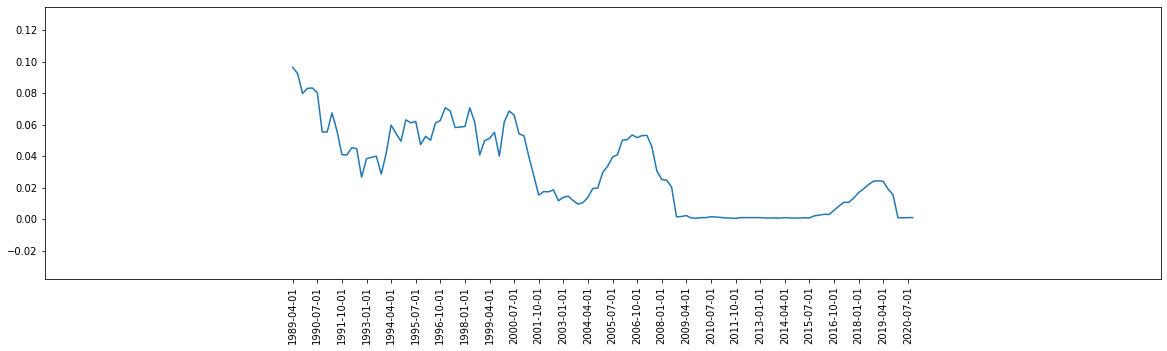

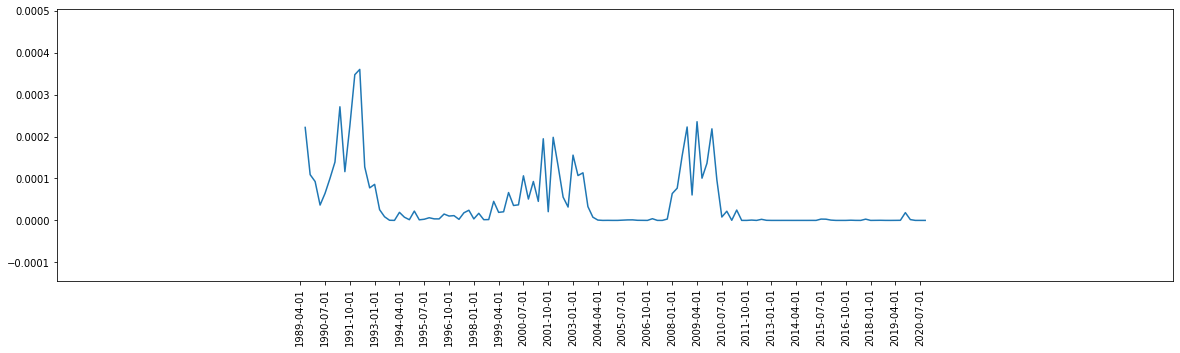

In [315]:
k1 = 76;
plotthis(y_raw[m_i,(k1):(203)])
plotthis(Y_pred[m_i,0:(203-k1)])

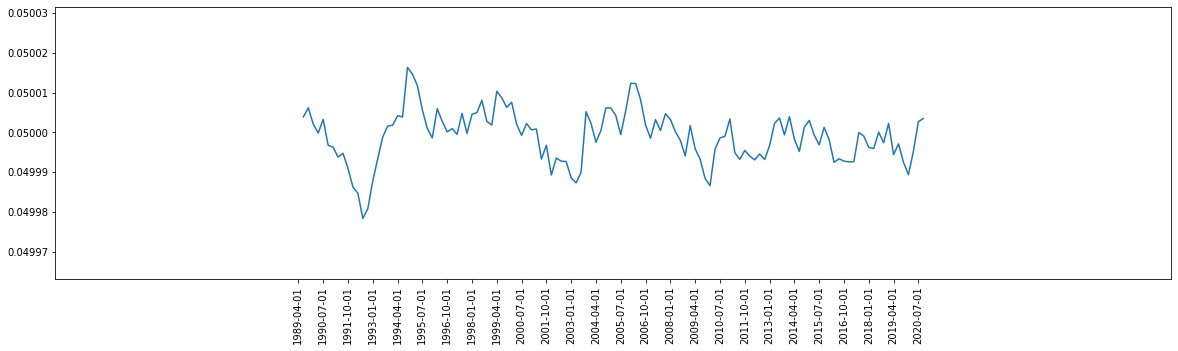

In [316]:
z = (PROB[0:(203-k1)])
plotthis(z)


Seignorage Shock:


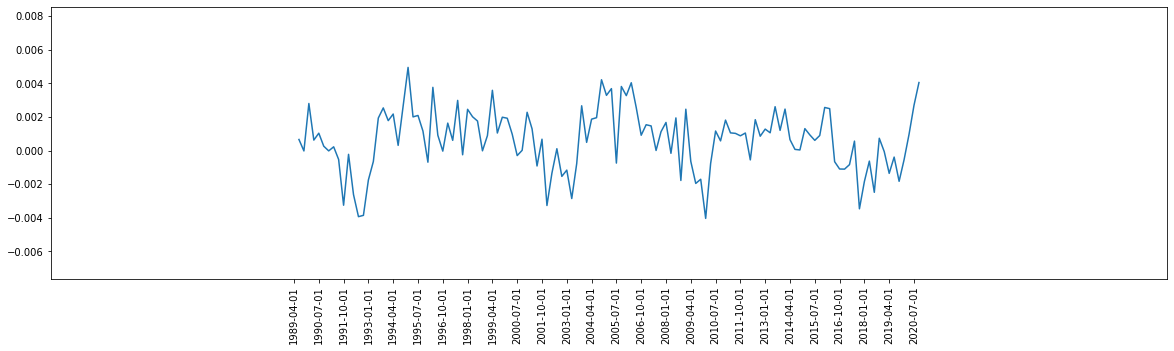

Credit Shock:


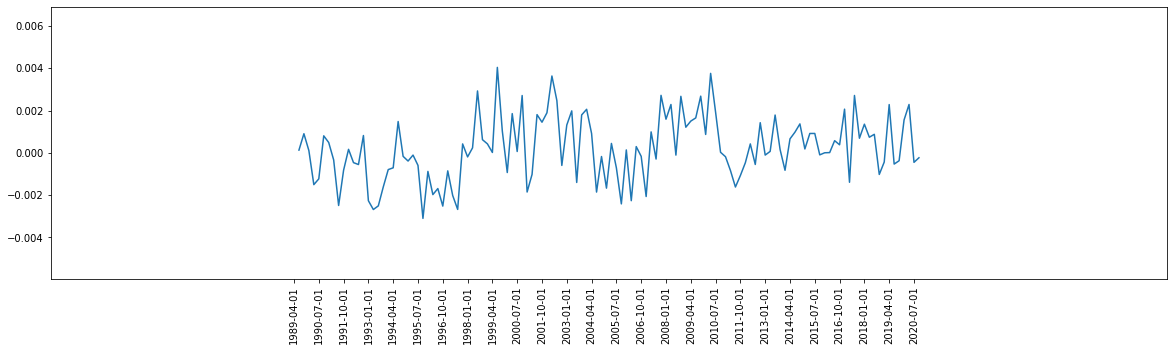

Demand Shock:


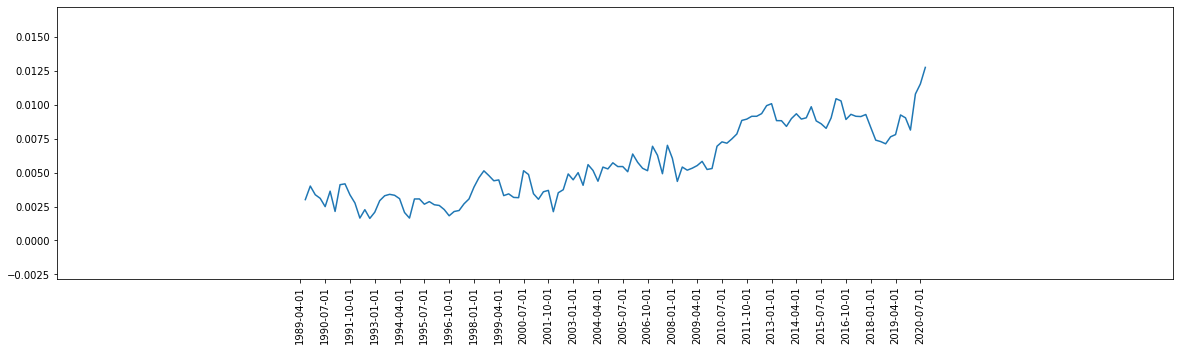

Productivity Shock:


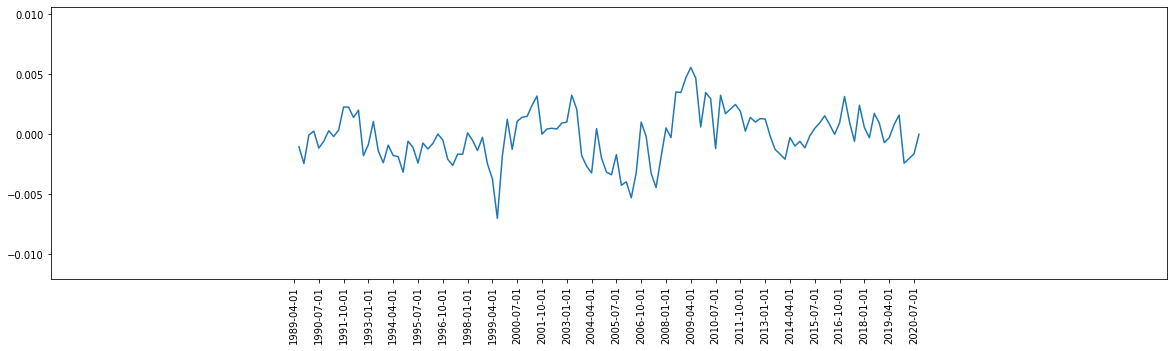

In [317]:
r = 0;a = 1;s = 2;u = 3;e = 4;
y = 0;pi = 1;q = 2;q_k = 3;
b = 0;k = 1;q_km = 2;b_km = 3;w = 4;tau = 5;b_k = 6;i = 7;
r = 0;a = 1;s = 2;u = 3;e = 4
print('Seignorage Shock:')
plotthis(U_pred[s,0:(203-k1)] )
print('Credit Shock:')
plotthis(U_pred[e,0:(203-k1)] )
print('Demand Shock:')
plotthis(-U_pred[r,0:(203-k1)] )
print('Productivity Shock:')
plotthis(U_pred[a,0:(203-k1)] )

In [267]:
##### More DATA #######
para = np.mean(Thetasim_PF[10000:180000],0)
#para = (Thetasim_PF[170000])

In [456]:
def Generate_2(para,y_raw_1,y_raw_E1,J,i_p):  
    T = 203
    loops = 1
    # Capital Share & Depreciation
    para[2] = .3;
    para[3] = .025;
    # Duration of Bonds
    para[4] = .9059;
    para[5] = .89;
    # Proportion of taxes to Capital
    para[16] = .5
    Q0,G0,Q1,G1,Q0_z,G0_z,Q1_z,G1_z,PSI,B11,B12,B13,B14,B21,B22,B23,B11_z,B12_z,B13_z,B14_z,B21_z,B22_z,B23_z,R =Init(para,aa)    
    m_pi = 0;m_x = 1;m_s =2;m_tau =3;m_b = 4;m_q = 5;m_qk = 6;m_i = 7;m_k=8;m_w=9;m_bk=10 
    y = 0;pi = 1;q = 2;q_k = 3;
    b = 0;k = 1;q_km = 2;b_km = 3;w = 4;tau = 5;b_k = 6;i = 7;
    r = 0;a = 1;s = 2;u = 3;e = 4
    PSI*=1e-2;
    M_bar = np.zeros([11,17]);
    M_bar[m_pi,pi] = 1e0;
    M_bar[m_x,x] = 1e0;
    M_bar[m_s,s] = 1e0; 
    M_bar[m_tau,tau] = 1e0;
    M_bar[m_b,b] = 1e0;
    M_bar[m_q,q] = 1e0;
    M_bar[m_qk,qk] = 1e0;
        
    M_bar[m_bk,qk+3] = 1e2;
    M_bar[m_k,k+3] = 1e2;
    M_bar[m_w,w+3] = 1e2;
    
    
    #index
    EA = 0;E10 = 1;Epi = 2;EG = 3;EX = 4;Ei = 5
    M_E = np.zeros([6,17]);
    M_E[EA,m_qk] = 1e0;
    M_E[E10,m_q] = 1e0;
    M_E[EX,y] = 1e0;
    M_E[Epi,pi] = 1e0; 
    M_E[EG,s+3] = 4e1; 
    M_E[EG,tau+3] = -4e2;
    M_E[EG,b+3] = 4e2;
    M_E[EG,q+3] = 4e1;
    
    LL = np.zeros([T])
    Y = 1e-2*abs(norm([J,8,1]))
    M = 1e-2*abs(norm([J,8,1]))
    EM =1e-2*(norm([J,8,1])) 
    EM[:,-1] = 1e0*abs(EM[:,-1])
    EM1 =1e-2*norm([J,8,1])
    EY = 1e0*norm([J,4,1])
    EY1 = 1e0*np.zeros([J,8,1])
    Q_0 = np.zeros([J,8,5])+Q0
    Q_1 = np.zeros([J,8,8])+Q1
    G_0 = np.zeros([J,4,5])+G0
    G_1 = np.zeros([J,4,8])+G1
    Q_0_z = np.zeros([J,8,5])+Q0_z
    Q_1_z = np.zeros([J,8,8])+Q1_z
    G_0_z = np.zeros([J,4,5])+G0_z
    G_1_z = np.zeros([J,4,8])+G1_z
    PHI = np.hstack([resh(Q_0,[J,-1,1]),resh(Q_1,[J,-1,1]),resh(G_0,[J,-1,1]),resh(G_1,[J,-1,1])])
    PHI_z = np.hstack([resh(Q_0_z,[J,-1,1]),resh(Q_1_z,[J,-1,1]),resh(G_0_z,[J,-1,1]),resh(G_1_z,[J,-1,1])])
    Y_pred = np.zeros([11,T]);
    g =para[29];p=1;s=1e0;EZ_lag = 1e-4*abs(norm([J,17,1]));T1 = 128;i_p = 1e2;s=1e-1
    Z_lag = abs(norm([J,17,1])) ;Y_FOR= np.zeros([11,T]);k2 = 92;PROB = np.zeros([203-k2])
    U_pred = np.zeros([5,T]);M_pred = np.zeros([8,T]);EM_pred = np.zeros([8,T]);
    EY_pred = np.zeros([4,T]);
    for t in range(203-k2):
        np.random.seed(t)
        eps =1e-3*np.random.multivariate_normal(np.zeros([5]),PSI[0:5,:],J);
        r = resh(np.diag(R),[1,5,1])
        if t==0:
            r_star = para[28]*np.random.standard_normal([J])
            U = resh(eps,[J,5,1])
            U[:,0,:]+=para[22]*resh(r_star,[-1,1])
        else:
            U = resh(U,[J,5,1])*r+resh(eps,[J,5,1])
            r_star = r_star + para[28]*np.random.standard_normal([J])
            U[:,0]+=para[22]*resh(r_star,[-1,1])
        if p==1:
            EM   = (ab(Q_1,M,loops)+ab(Q_0,U,loops))
            U_r  = (U*r)
            EM1  = (ab(Q_0,U_r,loops)+ab(Q_1,EM,loops))
            EY  = (ab(G_0,U,loops)+ab(G_1,EM,loops))
            EY1  = (ab(G_0,U_r,loops)+ab(G_1,EM1,loops))
            M    = ab(B21,EY1,loops) +ab(B22,M,loops)+ab(B23,U,loops)
        else:
            EM   = (ab(Q1,M,loops)+ab(Q0,U,loops))
            U_r  = (U*r)
            EM1  = (ab(Q0,U_r,loops)+ab(Q1,EM,loops))
            EY  = (ab(G0,U,loops)+ab(G1,EM,loops))
            EY1  = (ab(G0,U_r,loops)+ab(G1,EM1,loops))
            M    = ab(B21,EY1,loops) +ab(B22,M,loops)+ab(B23,U,loops)
            
        M[np.where(M[:,i]<=0)[0],i] = 0 
        I = M[:,i]
        Y    = ab(B11,EY1,loops) +ab(B12,M,loops)+ab(B12,M,loops)+ab(B13,U,loops)+ab(B14,EM1,loops)
        if p==1:
            X = np.zeros([J,12,156])
            X[:,0:8,0:40] = np.kron(np.eye(8),resh(U,[J,1,5]))
            X[:,0:8,40:104] = np.kron(np.eye(8),resh(M,[J,1,8]))
            X[:,8:,104:136] = np.kron(np.eye(4),resh(EM,[J,1,8]))
            X[:,8:,136:] = np.kron(np.eye(4),resh(U,[J,1,5]))
            ERR_y  = Y - EY;ERR_m  = M - EM
            ERR = np.hstack([ERR_m,ERR_y])
            PHI = PHI + g*ab(np.swapaxes(X,2,1),ERR,1)
            PHI_z = PHI_z + g*ab(np.swapaxes(X,2,1),ERR,1)
            prob = .1*np.array(sc.stats.norm.cdf(0,(EM[:,-1,:]),1))

            K =resh(np.tile(resh(prob,[-1,1]),[8*8]),[-1,8,8])
            Q_0 = (1-K[-1,0:8,0:5])*resh(PHI[:,0:40],[-1,8,5]) +K[-1,0:8,0:5]*resh(PHI_z[:,0:40],[-1,8,5])
            Q_1 = (1-K[-1,0:8,0:8])*resh(PHI[:,40:104],[-1,8,8]) +K[-1,0:8,0:8]*resh(PHI_z[:,40:104],[-1,8,8])
            G_0 = (1-K[-1,0:4,0:5])*resh(PHI[:,104:124],[-1,4,5])+K[-1,0:4,0:5]*resh(PHI_z[:,104:124],[-1,4,5])
            G_1 = (1-K[-1,0:4,0:8])*resh(PHI[:,124:],[-1,4,8])+K[-1,0:4,0:8]*resh(PHI_z[:,124:],[-1,4,8])
        Z = np.hstack([Y,M,U])
        EZ = np.hstack([EY1,EM1,U])
        YY = ab(M_bar,Z,loops)- ab(M_bar,Z_lag,loops)
        YY[:,m_i] = I*4e2
        YY[:,m_x] *= 4e2
        YY[:,m_pi] *= 4e2
        YY[:,m_q] *= 1e0
        YY[:,m_qk] *= 1e0
        YY[:,m_s] *= 1e2
        YY[:,m_tau] *= 4e2
        YY[:,m_b] *= 4e2
        
        YY[:,m_bk] *= 1e2;
        YY[:,m_k] *= 1e2;
        YY[:,m_w] *= 1e2;
    
        YY_E = ab(M_E,EZ,loops) - ab(M_E,EZ_lag,loops)
        YY_E[:,EA] *= 1e2
        YY_E[:,E10] *= 1e2
        YY_E[:,EX] *=1e2
        YY_E[:,Epi] *=1e2 
        YY_E[:,EG] *=1e2
        YY_E[:,Ei] = EM[:,-1,:]
        if t==0:
            Y_FOR[:,t] = resh(np.mean(YY*s,0),[-1])
        else:
            Y_FOR[:,t] = resh(np.sum(resh(w,[-1,1,1])*YY*s,0),[-1])
        err = (YY-resh(y_raw_1[:,t],[1,-1,1]))**2 
        err_E = (YY_E*1e-0-resh(1e-0*y_raw_E1[16+t,:],[1,-1,1]))**2 
        err_E*=0
        err_E[:,Ei] = 1e1
        w = np.exp(-0.5*(np.sum(err*i_p,1))+ -0.5*(np.sum(err_E*i_p,1)  ) )      
        w*= 1e0
        w = (w/np.sum(w))
        
        try:
            idx = np.random.choice(np.arange(J), size=int(J), replace=True, p=resh(w,[-1]))
        except:
            idx = np.arange(J)
        
        if p==1:
            Q_0 = Q_0[idx]
            G_0 = G_0[idx]
            Q_1 = Q_1[idx]
            G_1 = G_1[idx]
        M = M[idx]        
        U = U[idx]
        Y = Y[idx]
        r_star = r_star[idx]
        Z_lag = Z[idx]
        EZ_lag = EZ[idx]
        w = np.array(w)        
        Y_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*YY*s,0),[-1])*1e2 
        U_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*U*s,0),[-1]) 
        M_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*M*s,0),[-1]) 
        EM_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*EM1*s,0),[-1])
        EY_pred[:,t] = resh(np.sum(resh(w,[-1,1,1])*EY1*s,0),[-1])
        PROB[t] = resh(np.sum(w*prob*1,0),[-1])
    return PROB,Y_FOR,Y_pred,U_pred,M_pred,EM_pred,EY_pred

<ipython-input-456-64bd474dd21c>:147: RuntimeWarning: invalid value encountered in true_divide
  w = (w/np.sum(w))


Text(0.5, 1.0, 'FFR')

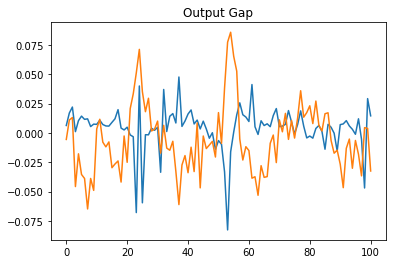

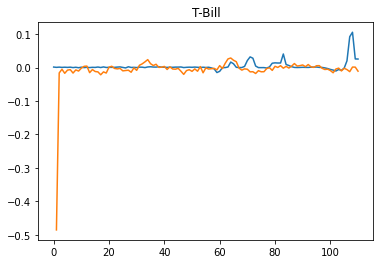

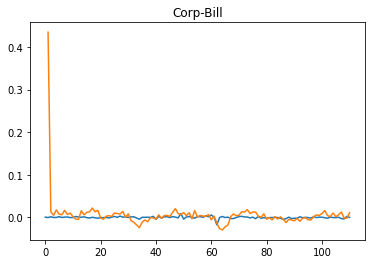

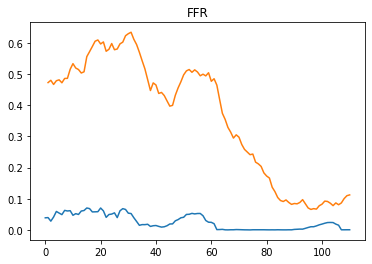

In [457]:
PROB,Y_FOR,Y_pred,U_pred,M_pred,EM_pred,EY_pred = Generate_2(para,y_raw_1,y_raw_E1,J=1000,
                                                            i_p=1e10)

fig1, ax1, = plt.subplots() 
ax1.plot((y_raw_1[m_x,10:]))
ax1.plot((3e0*Y_pred[m_x,10:(203-k2)]))
ax1.set_title("Output Gap")

fig2, ax2, = plt.subplots() 
ax2.plot((y_raw_1[m_q,:]))
ax2.plot((1e0*Y_pred[m_q+1,0:(203-k2)]))
ax2.set_title("T-Bill")

fig3, ax3, = plt.subplots() 
ax3.plot((y_raw_1[m_qk,:]))
ax3.plot((1e0*Y_pred[m_qk,0:(203-k2)]))
ax3.set_title("Corp-Bill")




fig4, ax4= plt.subplots()
ax4.plot((y_raw_1[m_i,:]))
ax4.plot((Y_pred[m_i,0:(203-k2)]))
ax4.set_title("FFR")


Actual FFR:


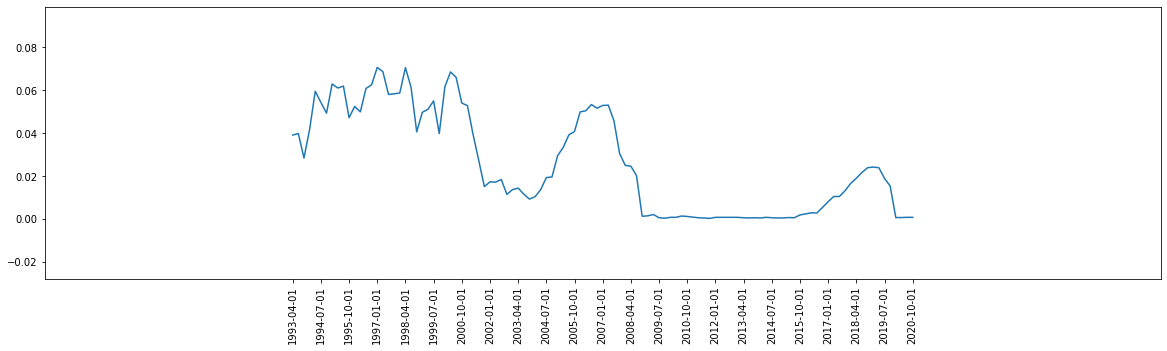

Output Gap:


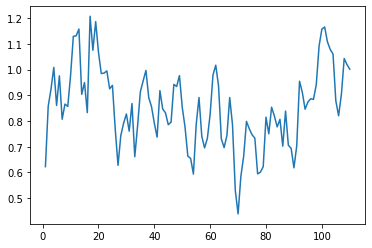

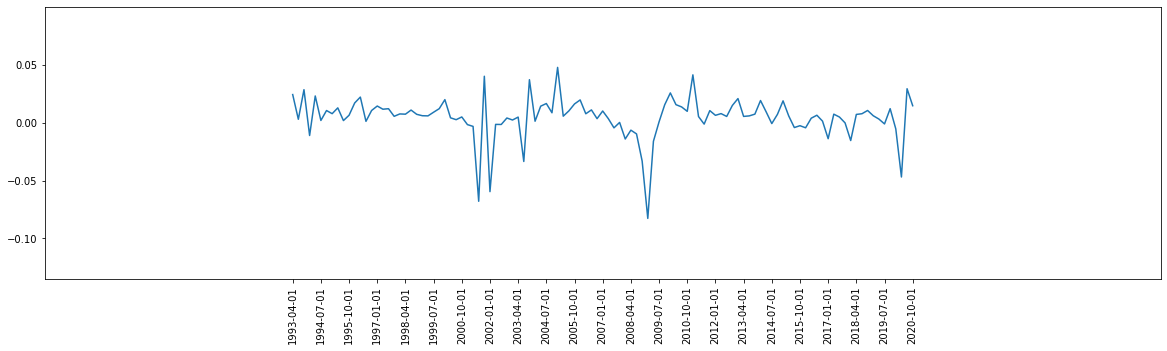

ZLB Probability:


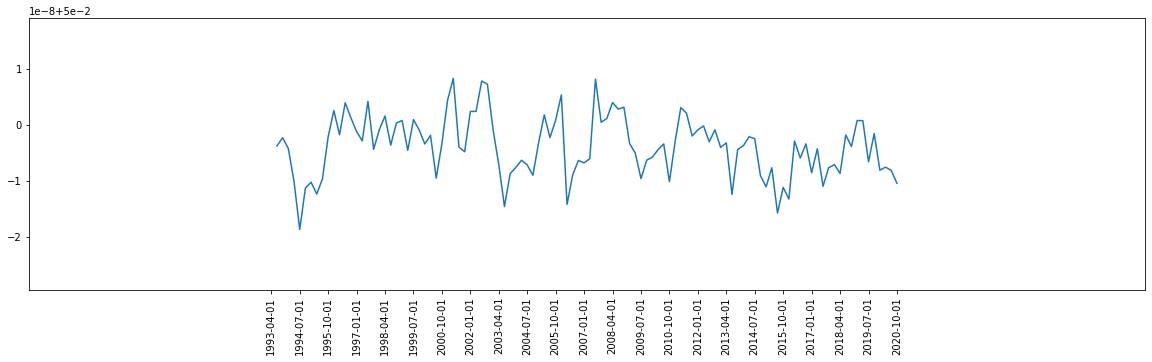

In [425]:
k2 = 92;
print('Actual FFR:')
#plotthis_2(y_raw_1[m_i,:])
plotthis_2(y_raw_1[m_i,:])
#plt.plot(y_raw_1[m_i,:])
plt.plot(4e1*Y_pred[m_i,0:(203-k2)])



#plt.plot(y_raw_1[m_x,:])
#plt.plot(1e2*Y_pred[m_x,0:(203-k2)])
#print('Predicted FFR:')
#plotthis_2(Y_pred[m_i,0:(203-k2)])
#print('Predicted Output Gap:')
#plotthis_2(Y_pred[m_x,0:(203-k2)])
print('Output Gap:')
plotthis_2(y_raw_1[m_x,:])

print('ZLB Probability:')
plotthis_2(PROB)

Seignorage Shock:


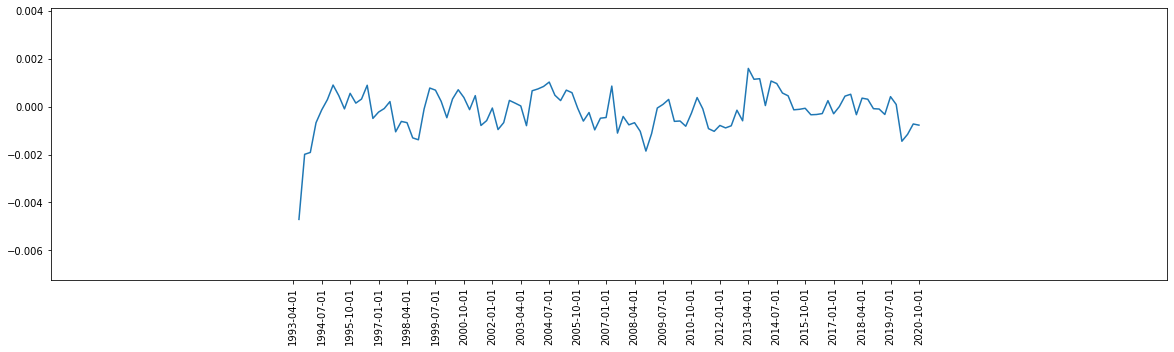

Credit Shock:


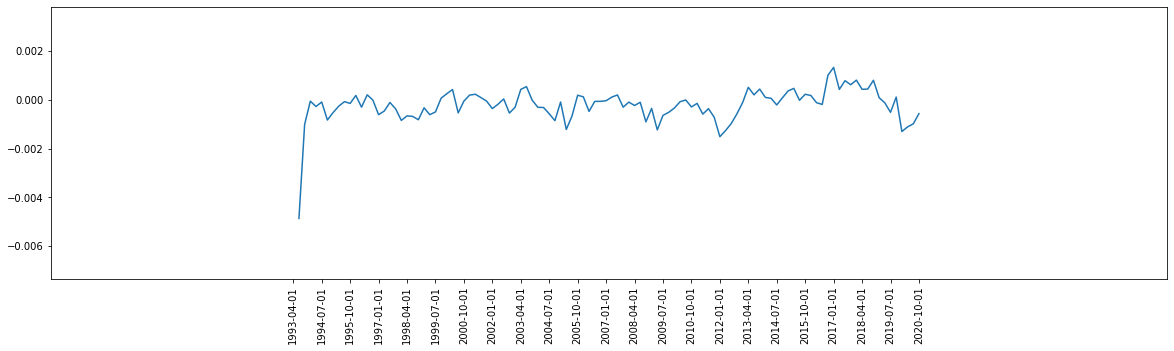

Demand Shock:


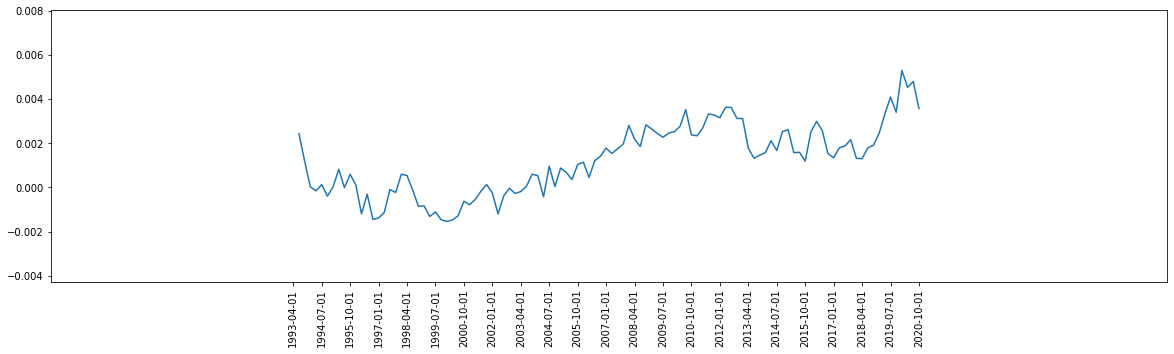

Productivity Shock:


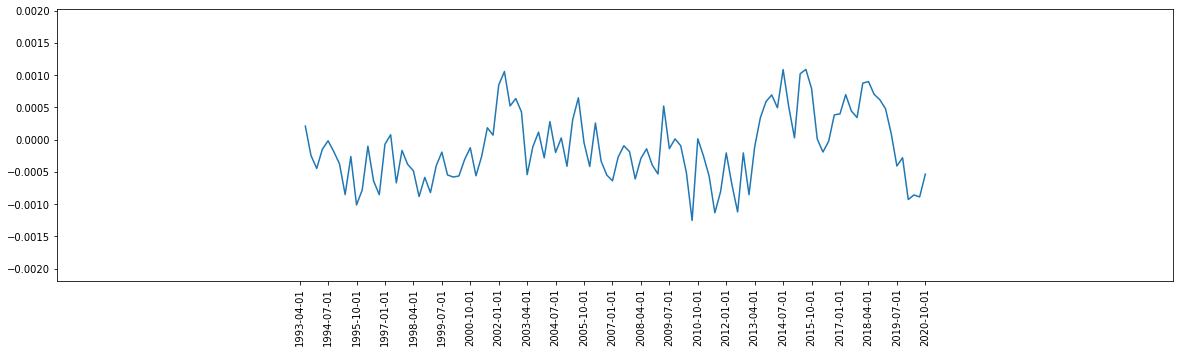

Cost Push Shock:


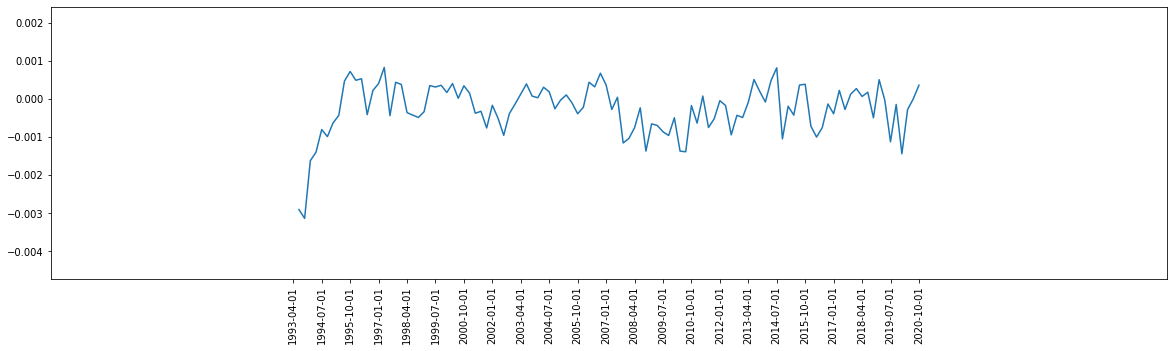

In [306]:
r = 0;a = 1;s = 2;u = 3;e = 4;
y = 0;pi = 1;q = 2;q_k = 3;
b = 0;k = 1;q_km = 2;b_km = 3;w = 4;tau = 5;b_k = 6;i = 7;
print('Seignorage Shock:')
plotthis_2(U_pred[s,0:(203-k2)] )
print('Credit Shock:')
plotthis_2(U_pred[e,0:(203-k2)] )
print('Demand Shock:')
plotthis_2(-U_pred[r,0:(203-k2)] )
print('Productivity Shock:')
plotthis_2(U_pred[a,0:(203-k2)] )
print('Cost Push Shock:')
plotthis_2(U_pred[u,0:(203-k2)] )

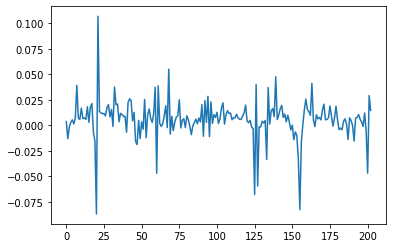

In [414]:
plt.plot(y_raw[m_x,:])

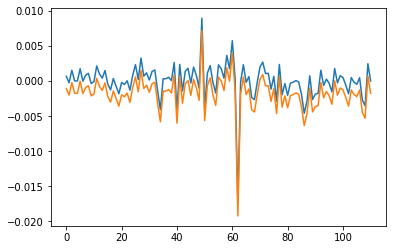

In [442]:
plt.plot(y_raw_1[m_qk,:])
plt.plot(y_raw[m_qk,92:])

In [424]:
y_raw[0,-1]-y_raw_1[0,-1]

-0.0017559291040847012